In [59]:
import kuzu
from pathlib import Path
import os


DATA_PATH = Path("../../../data/staging")
DB_NAME = "pecos_plus.db"
DEST_PATH = os.path.join(DATA_PATH, DB_NAME)

db = kuzu.Database(DEST_PATH)
conn = kuzu.Connection(db)

In [60]:
# Define the schema
results = conn.execute("CALL show_tables() RETURN *;")
while results.has_next():
    print(results.get_next())



['AffiliatedWith', 'REL_GROUP', 'local(kuzu)', '']
['AffiliatedWith_Person_LegalEntity', 'REL', 'local(kuzu)', '']
['AffiliatedWith_Person_PECOSEnrolledCareProvider', 'REL', 'local(kuzu)', '']
['AffiliatedWith_LegalEntity_PECOSEnrolledCareProvider', 'REL', 'local(kuzu)', '']
['LegalEntity', 'NODE', 'local(kuzu)', '']
['Address', 'NODE', 'local(kuzu)', '']
['EmployedBy', 'REL', 'local(kuzu)', '']
['OwnedBy_PECOSEnrolledCareProvider_LegalEntity', 'REL', 'local(kuzu)', '']
['OwnedBy', 'REL_GROUP', 'local(kuzu)', '']
['OwnedBy_PECOSEnrolledCareProvider_Person', 'REL', 'local(kuzu)', '']
['PECOSEnrolledCareProvider', 'NODE', 'local(kuzu)', '']
['LocatedAt_PECOSEnrolledCareProvider_Address', 'REL', 'local(kuzu)', '']
['LocatedAt_Person_Address', 'REL', 'local(kuzu)', '']
['LocatedAt', 'REL_GROUP', 'local(kuzu)', '']
['Person', 'NODE', 'local(kuzu)', '']


In [61]:
results.has_next()

False

In [57]:
results = conn.execute("""
    MATCH (p:Person) RETURN * LIMIT 10;
""")
print(results.get_next())

results = conn.execute("""
    MATCH (p:PECOSEnrolledCareProvider) RETURN * LIMIT 10;
""")
print(results.get_next())

[{'_id': {'offset': 0, 'table': 0}, '_label': 'Person', 'associate_id': '0042100026', 'first_name': 'PETER', 'middle_name': 'K', 'last_name': 'FUNG'}]
[{'_id': {'offset': 0, 'table': 2}, '_label': 'PECOSEnrolledCareProvider', 'associate_id': '5193632180', 'enrollment_id': 'O20020812000015', 'enrollment_state': 'TN', 'provider_type_code': '00-09', 'provider_type_text': 'PART A PROVIDER - HOSPITAL', 'npi': '1467408781', 'multiple_npi_flag': 'N', 'ccn': '440058', 'organization_name': 'SOUTHERN TENNESSEE MEDICAL CENTER LLC', 'doing_business_as_name': 'SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM WINCHESTER', 'incorporation_date': '1998-11-09', 'incorporation_state': 'DE', 'organization_type_structure': 'LLC', 'organization_other_type_text': None, 'proprietary_nonprofit': 'P', 'practice_location_type': 'MAIN/PRIMARY HOSPITAL LOCATION', 'location_other_type_text': None}]


In [58]:
# """
# [{'_id': {'offset': 0, 'table': 0}, '_label': 'Person', 'associate_id': '0042100026', 'first_name': 'PETER', 'middle_name': 'K', 'last_name': 'FUNG'}]
# [{'_id': {'offset': 12288, 'table': 2}, '_label': 'PECOSEnrolledCareProvider', 'associate_id': '0042301640', 'enrollment_id': 'O20070810000797', 'enrollment_state': 'CA', 'provider_type_code': '00-06', 'provider_type_text': 'PART A PROVIDER - HOME HEALTH AGENCY', 'npi': '1467643809', 'multiple_npi_flag': 'N', 'ccn': '059092', 'organization_name': 'DIRECT NURSING SERVICES, INC.', 'doing_business_as_name': None, 'incorporation_date': '2007-06-20', 'incorporation_state': 'CA', 'organization_type_structure': 'CORPORATION', 'organization_other_type_text': None, 'proprietary_nonprofit': 'P', 'practice_location_type': None, 'location_other_type_text': None}]
# """

# result = conn.execute("""
#     MATCH (p1:PECOSEnrolledCareProvider), (p2:Person) 
#     WHERE p1.associate_id = '0042301640' AND p2.associate_id = '0042100026' 
#     CREATE (p1)-[:OwnedBy {percentage_ownership: '10%', role_text: 'Big Dawg'}]->(p2)
# """)

# results = conn.execute("""
#     MATCH (p:PECOSEnrolledCareProvider)-[r:OwnedBy]->(p2:Person) RETURN r.role_text, p2.first_name LIMIT 10;
# """)

# print(results.get_next())

In [45]:
results = conn.execute("""
    MATCH (p:PECOSEnrolledCareProvider)-[r:OwnedBy]->(p2:Person) RETURN r.role_text, p2.first_name LIMIT 10;
""")

count_query = "MATCH ()-[r]->() RETURN count(r) AS relationship_count"
results = conn.execute(count_query)
relationship_count = results.get_next()
print("Number of relationships:", relationship_count)


Number of relationships: [243222]


In [46]:
result = conn.execute("""
MATCH (p:PECOSEnrolledCareProvider) WHERE p.enrollment_id = 'O20080410000455' RETURN *;
""")
print(result.get_next())

[{'_id': {'offset': 43799, 'table': 2}, '_label': 'PECOSEnrolledCareProvider', 'associate_id': '7911811583', 'enrollment_id': 'O20080410000455', 'enrollment_state': 'PA', 'provider_type_code': '00-04', 'provider_type_text': 'PART A PROVIDER - FEDERALLY QUALIFIED HEALTH CENTER (FQHC)', 'npi': '1497783559', 'multiple_npi_flag': 'N', 'ccn': '391870', 'organization_name': 'CORNERSTONE CARE INC.', 'doing_business_as_name': None, 'incorporation_date': '1978-07-11', 'incorporation_state': 'PA', 'organization_type_structure': 'CORPORATION', 'organization_other_type_text': None, 'proprietary_nonprofit': 'N', 'practice_location_type': None, 'location_other_type_text': None}]


In [47]:
result = conn.execute("""
MATCH (p:PECOSEnrolledCareProvider) WHERE p.enrollment_id = 'O20111209000561' RETURN *;
""")
print(result.get_next())


[{'_id': {'offset': 45717, 'table': 2}, '_label': 'PECOSEnrolledCareProvider', 'associate_id': '7911811583', 'enrollment_id': 'O20111209000561', 'enrollment_state': 'PA', 'provider_type_code': '00-04', 'provider_type_text': 'PART A PROVIDER - FEDERALLY QUALIFIED HEALTH CENTER (FQHC)', 'npi': '1194029819', 'multiple_npi_flag': 'N', 'ccn': '391020', 'organization_name': 'CORNERSTONE CARE INC.', 'doing_business_as_name': None, 'incorporation_date': '1978-07-31', 'incorporation_state': 'PA', 'organization_type_structure': 'CORPORATION', 'organization_other_type_text': None, 'proprietary_nonprofit': 'N', 'practice_location_type': None, 'location_other_type_text': None}]


In [48]:
result = conn.execute("""
MATCH (p:PECOSEnrolledCareProvider) WHERE p.associate_id = '7911811583' RETURN *;
""")
print(result.get_next())

[{'_id': {'offset': 43197, 'table': 2}, '_label': 'PECOSEnrolledCareProvider', 'associate_id': '7911811583', 'enrollment_id': 'O20060906000595', 'enrollment_state': 'PA', 'provider_type_code': '00-04', 'provider_type_text': 'PART A PROVIDER - FEDERALLY QUALIFIED HEALTH CENTER (FQHC)', 'npi': '1710147004', 'multiple_npi_flag': 'N', 'ccn': '391964', 'organization_name': 'CORNERSTONE CARE INC.', 'doing_business_as_name': 'CORNERSTONE CARE', 'incorporation_date': '1978-07-31', 'incorporation_state': 'PA', 'organization_type_structure': 'CORPORATION', 'organization_other_type_text': None, 'proprietary_nonprofit': 'N', 'practice_location_type': None, 'location_other_type_text': None}]


In [49]:
import sqlite3
sql_conn = sqlite3.connect("../../../data/staging/cms_data_api_raw.db")
results = sql_conn.execute("SELECT enrollment_id FROM vw_enrolled_care_provider_organizations;")
s1 = set([r[0] for r in results])

In [50]:
k_cursor = conn.execute("""
MATCH (p:PECOSEnrolledCareProvider)
RETURN p.enrollment_id;
""")
s2 = set([])
while k_cursor.has_next():
    s2.add(k_cursor.get_next()[0])

In [51]:
s2 - s1

set()

In [52]:
s1 - s2

{'O20090413000218',
 'O20071101000279',
 'O20080916000511',
 'O20070730000861',
 'O20090828000576',
 'O20070517000013',
 'O20080104000331',
 'O20090319000674',
 'O20090616000581',
 'O20080404000449',
 'O20090529000368',
 'O20080527000147',
 'O20150517000008',
 'O20071211000523',
 'O20081007000164',
 'O20090213000448',
 'O20080410000707',
 'O20080103000549',
 'O20090217000123',
 'O20090209000483',
 'O20071228000364',
 'O20090306000551',
 'O20120418000688',
 'O20140430002591',
 'O20140805001873',
 'O20090420000125',
 'O20100125000564',
 'O20101018001241',
 'O20081113000086',
 'O20130819000160',
 'O20150410001907',
 'O20081216000645',
 'O20130909000332',
 'O20100203000831',
 'O20101230000934',
 'O20100622000541',
 'O20140520001658',
 'O20090218000209',
 'O20071120000045',
 'O20070914000033',
 'O20150806012245',
 'O20070607000047',
 'O20080916000355',
 'O20100623000785',
 'O20150312002100',
 'O20071211000145',
 'O20120404000748',
 'O20140902000453',
 'O20140623000626',
 'O20090507000443',


In [53]:
s1.difference(s2)

{'O20090413000218',
 'O20071101000279',
 'O20080916000511',
 'O20070730000861',
 'O20090828000576',
 'O20070517000013',
 'O20080104000331',
 'O20090319000674',
 'O20090616000581',
 'O20080404000449',
 'O20090529000368',
 'O20080527000147',
 'O20150517000008',
 'O20071211000523',
 'O20081007000164',
 'O20090213000448',
 'O20080410000707',
 'O20080103000549',
 'O20090217000123',
 'O20090209000483',
 'O20071228000364',
 'O20090306000551',
 'O20120418000688',
 'O20140430002591',
 'O20140805001873',
 'O20090420000125',
 'O20100125000564',
 'O20101018001241',
 'O20081113000086',
 'O20130819000160',
 'O20150410001907',
 'O20081216000645',
 'O20130909000332',
 'O20100203000831',
 'O20101230000934',
 'O20100622000541',
 'O20140520001658',
 'O20090218000209',
 'O20071120000045',
 'O20070914000033',
 'O20150806012245',
 'O20070607000047',
 'O20080916000355',
 'O20100623000785',
 'O20150312002100',
 'O20071211000145',
 'O20120404000748',
 'O20140902000453',
 'O20140623000626',
 'O20090507000443',


In [54]:
len(s1), len(s2)

(57877, 53879)

In [55]:
k_cursor = conn.execute("""
MATCH (p:PECOSEnrolledCareProvider)
WHERE p.enrollment_id IS NULL 
RETURN p.enrollment_id;
""")

s2 = set([])
while k_cursor.has_next():
    s2.add(k_cursor.get_next()[0])

/var/folders/mh/q19nkyxs15168mh5jckmvfn00000gn/T/ipykernel_77771/3543835217.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


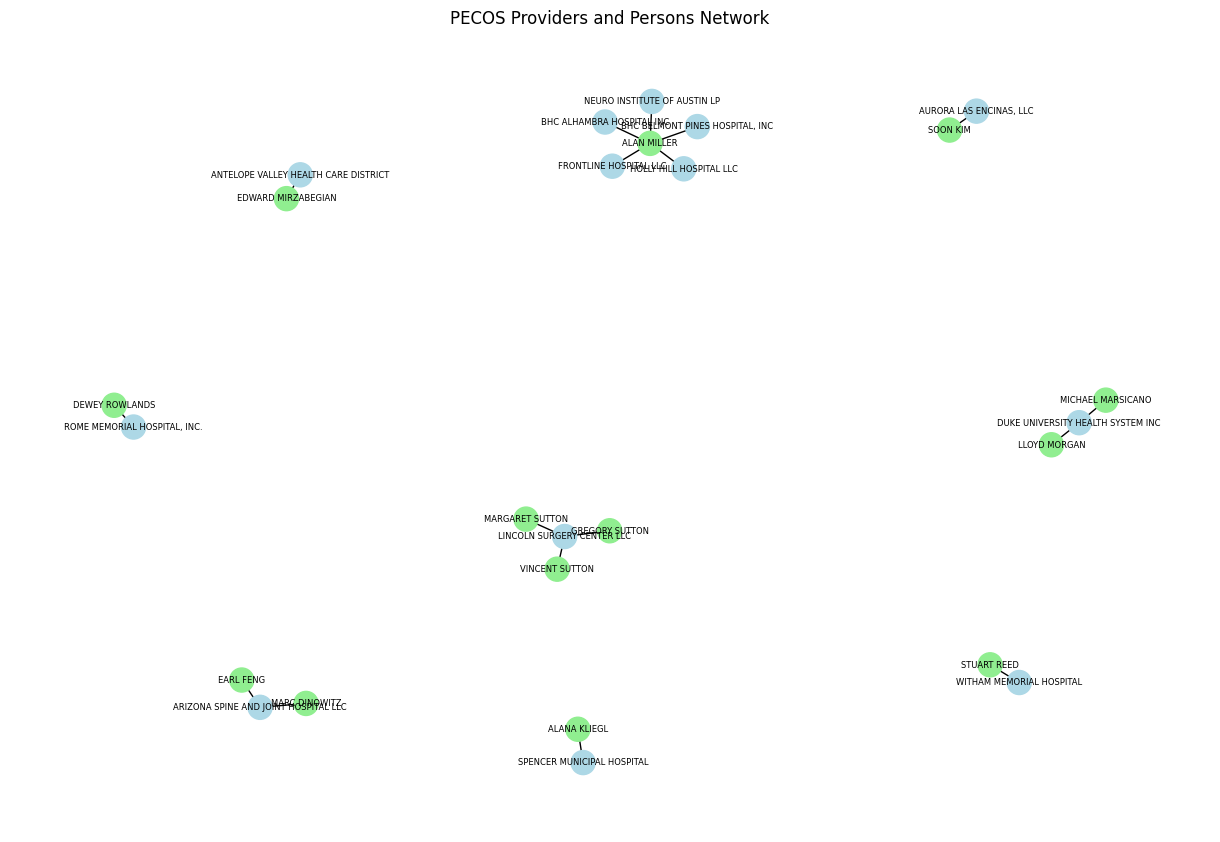

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
from kuzu import Connection, Database

# Assuming db and conn are already defined
# db = kuzu.Database(DEST_PATH)
# conn = kuzu.Connection(db)

# Execute the query
query = """
MATCH (p:PECOSEnrolledCareProvider)-[r:OwnedBy]->(person:Person)
RETURN p, r, person
LIMIT 20
"""
res = conn.execute(query)

# Create a NetworkX graph
G = nx.Graph()

# Populate the graph
while res.has_next():
    row = res.get_next()
    provider = row[0]
    relationship = row[1]
    person = row[2]
    
    G.add_node(provider['_id']['offset'], label='Provider', name=provider['organization_name'])
    G.add_node(person['_id']['offset'], label='Person', name=f"{person['first_name']} {person['last_name']}")
    G.add_edge(provider['_id']['offset'], person['_id']['offset'], type=relationship['role_text'])

# Set up colors
colors = ['lightblue' if G.nodes[node]['label'] == 'Provider' else 'lightgreen' for node in G.nodes()]

# Create the visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=300, font_size=8)

# Add labels
labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, labels, font_size=6)

plt.title("PECOS Providers and Persons Network")
plt.axis('off')
plt.tight_layout()
plt.show()